## Question 2

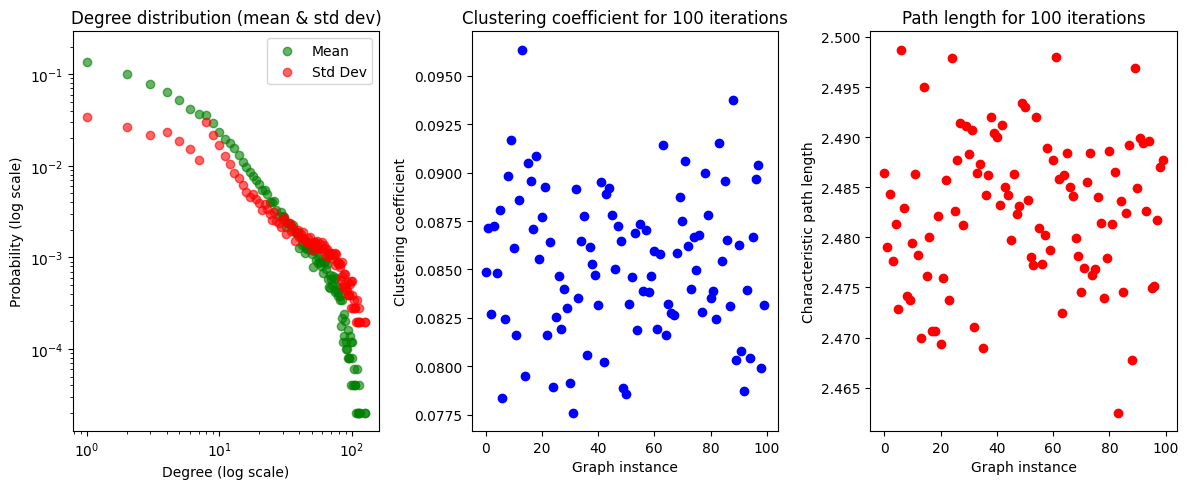

Mean clustering coeff for 100 graph: 0.08529248937016465
Mean characteristic path length for 100 graph: 2.4826926891534074


In [3]:
import random
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt

# function to create random graph in starting
def create_random_graph(n, p=0.5):
    graph = {i: [] for i in range(n)}
    
    for i in range(n):
        for j in range(i + 1, n):  
            if random.random() < p:
                graph[i].append(j)
                graph[j].append(i)

    return graph


# BFS function to compute shortest path distances
def bfs(graph, starting, n):
    distance_list = [math.inf] * n
    visited = [0] * n
    distance_list[starting] = 0
    visited[starting] = 1
    q = deque([starting])
    while len(q) > 0:
        currentnode = q.popleft()
        for neigh in graph[currentnode]:
            if visited[neigh] == 0:
                visited[neigh] = 1
                distance_list[neigh] = distance_list[currentnode] + 1
                q.append(neigh)
    return distance_list

num_of_nodes = 500
edges = 8
iteration = 100

degree_distributions = []
clustering_coeffs = []
char_path_lengths = []


global_min_d = math.inf
global_max_d = 0

for iter in range(iteration):

    graph = create_random_graph(10)
    
    listofnodes = []
    for i in range(10):
        degree = len(graph[i])
        listofnodes.extend([i] * degree)

    # constructing the scale-free graph
    for i in range(10, num_of_nodes):
        neigh_of_newnode = []
        while len(neigh_of_newnode) < edges:
            n_choice = random.choice(listofnodes)
            if n_choice not in neigh_of_newnode:
                neigh_of_newnode.append(n_choice)
        graph[i] = neigh_of_newnode
        for j in neigh_of_newnode:
            graph[j].append(i)
        listofnodes.extend([i] * edges)
        for k in neigh_of_newnode:
            listofnodes.append(k)

    # Compute clustering coefficient
    clusteringcoff = []
    for i in range(num_of_nodes):
        neigh = graph[i]
        degree = len(neigh)
        if degree < 2:
            clusteringcoff.append(0)
            continue
        link = 0 
        for j in neigh:
            for k in neigh:
                if j != k and j in graph[k]:
                    link += 1
        link = link // 2
        coff = (2 * link) / (degree * (degree - 1))
        clusteringcoff.append(coff)
    avg_clustering_coff = np.mean(clusteringcoff)
    clustering_coeffs.append(avg_clustering_coff)

    # Compute average path length using BFS
    tot_dist = 0
    pairs = 0
    for i in range(num_of_nodes):
        shortdist = bfs(graph, i, num_of_nodes)
        for j in range(num_of_nodes):
            if i != j and shortdist[j] != math.inf:
                tot_dist += shortdist[j]
                pairs += 1
    avg_pathlen = tot_dist / pairs if pairs > 0 else math.inf
    char_path_lengths.append(avg_pathlen)

    # Compute degree distribution
    degree_of_nodes = []
    for node in graph:
        degree_of_nodes.append(len(graph[node]))
    
    # Update global min and max degrees
    current_min = min(degree_of_nodes)
    current_max = max(degree_of_nodes)
    if current_min < global_min_d:
        global_min_d = current_min
    if current_max > global_max_d:
        global_max_d = current_max
    
    num_bins = current_max - current_min + 1
    total_d = [0] * num_bins
    for d in degree_of_nodes:
        total_d[d - current_min] += 1
    total_n = len(degree_of_nodes)
    degree_dist = []
    for c in total_d:
        prob = c / total_n
        degree_dist.append(prob)
    degree_distributions.append(degree_dist)

# Finding the maximum length for padding
max_length = 0
for d in degree_distributions:
    if len(d) > max_length:
        max_length = len(d)

# Paddin to make the length same
degree_distributions_padded = []
for d in degree_distributions:
    padding_length = max_length - len(d)
    padded_d = d + [0] * padding_length
    degree_distributions_padded.append(padded_d)

degree_distributions = np.array(degree_distributions_padded)

# Compute mean and standard deviation
degree_mean = np.mean(degree_distributions, axis=0)
degree_std = np.std(degree_distributions, axis=0)
degree_values = np.arange(global_min_d, global_min_d + len(degree_mean))


plt.figure(figsize=(12, 5))
# Plot degree distribution with standard dev
plt.subplot(1, 3, 1)
plt.scatter(degree_values, degree_mean, color='green', label='Mean', alpha=0.6)
plt.scatter(degree_values, degree_std, color='red', label='Std Dev', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Probability (log scale)')
plt.title('Degree distribution (mean & std dev)')
plt.legend()

# Plot clustering coefficient for 100 runs
plt.subplot(1, 3, 2)
plt.plot(range(iteration), clustering_coeffs, marker='o', linestyle='', color='blue')
plt.xlabel('Graph instance')
plt.ylabel('Clustering coefficient')
plt.title('Clustering coefficient for 100 iterations')

# Plot characteristic path length for 100 runs
plt.subplot(1, 3, 3)
plt.plot(range(iteration), char_path_lengths, marker='o', linestyle='', color='red')
plt.xlabel('Graph instance')
plt.ylabel('Characteristic path length')
plt.title('Path length for 100 iterations')

plt.tight_layout()
plt.show()

print("Mean clustering coeff for 100 graph:", np.mean(clustering_coeffs))
print("Mean characteristic path length for 100 graph:", np.mean(char_path_lengths))


In this question i have implemented the BA algorithm for 500 nodes and each node will have 8 edges in the graph I took 8 because it  is less then 10 as my initial seed random graph has only 10 nodes and the edge of 11th node should be less then or equal to 10. And all the topology here I have shown  I have explained it in q3 I have made 100 graphs here and plotted the graphs for them.
Kindly see the explanation present in the Q3.